# Assignment 5. morsecode
---

### **개요**
이번 Lab은 파이썬이 제공하는 데이터 구조중 가장 활용성이 높은 Dict Type의 데이터를 활용하여 모스부호(Morse Code)를 번역하는 프로그램을 개발한다. 이미 우리가 잘 알고 있듯이 모스 부호는 일종의 신호로 빛이나 소리를 이용하여 메세지를 전달하는 방식을 의미한다.

실제 모스 부호는 정해진 규칙이 있는데, 일반적인 규칙은 아래와 같습니다.

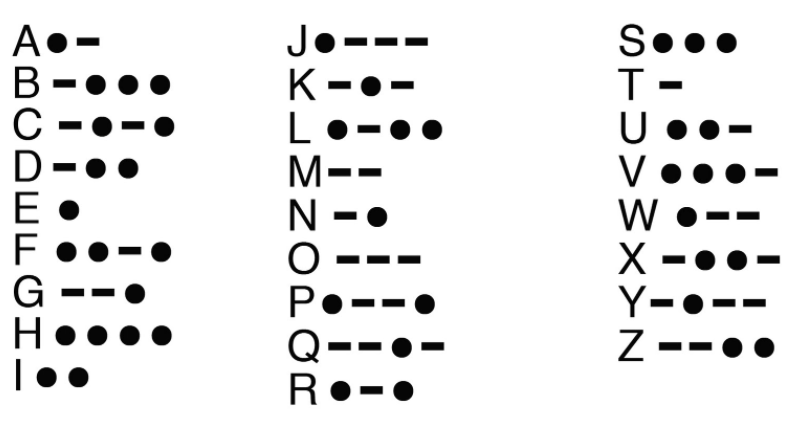

이러한 규칙을 컴퓨터에서 사용하는 문자중 "-", "."을 사용해서 나타내면 아래와 같이 표현할 수 있습니다.

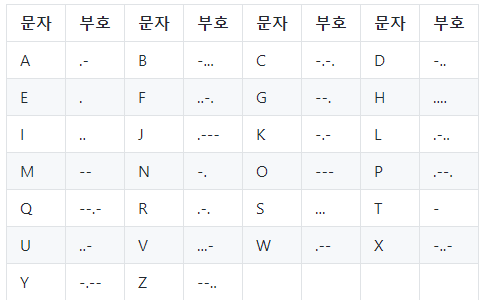

이번 Lab은 사용자가 알파벳 문자를 입력하면 모스 부호로 모스 부호를 입력하면 알파벳으로 바꿔주는 모스부호 변환기 프로그램을 만드는 것을 목적으로 합니다. 예를 들면 아래와 같은 형태입니다.

>**사용자의 문자열 입력**
```
사용자 입력: SOS
출력값: ... --- ...
```
>**사용자의 모스부호 입력**
```
사용자 입력: ... --- ...
출력값: SOS
```

물론 변환이 불가능한 입력에 한해서는 에러 메세지를 출력해야 합니다. 지금까지 처럼요 이미 Baseball을 통해 다양한 코딩 방식에 대해 경험한 여러분들에겐 그리 어렵지 않은 숙제일 거라고 믿습니다. 예 물론 제 희망사항입니다. 즐거운 마음으로 도전해봅시다.

---

**수정전 알아두어야 할 파이썬 함수: join**

이번 Lab을 진행하기전에 알아두고 시작하면 좋은 파이썬 함수가 있습니다. 바로 List에 있는 값들을 String type의 값으로 변환 시켜줄때 사용하는 join 함수입니다. 함수의 사용법은 아래와 같습니다.

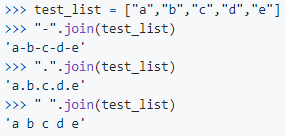

위 코드에서 보듯이 join 함수의 사용법은 `"연결부호".join(연결할 리스트 변수)"` 입니다. 부호가 변환에 따라 연결된 List 값도 각각 변환되어 출력됩니다. join 함수는 변환된 모스부호를 연결해서 표현할때 유용하게 사용될 수 있는 함수이므로 참고하기 바랍니다.



---



**Helper 함수**

먼저 본 Lab에서 제공하는 두개의 Helper 함수를 살펴봅시다.

---

- `get_morse_code_dict()`
    - 첫 번째 Helper 함수는 **get_morse_code_dict** 함수입니다.
    - 본 함수를 사용자가 호출 할 경우, 모스부호를 호출할 수 있는 dict type의 데이터를 반환해줍니다.
    - 이 함수는 아래와 같이 활용 가능합니다.

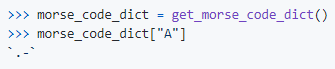

- `get_help_message()`
    - 두 번째 Helper 함수는 **get_help_message** 함수입니다.
    - 본 함수를 사용자가 호출 할 경우, 아래와 같이 모스부호에 대한 설명이 출력됩니다. 
    - main 함수에서 사용할 함 수이므로 당장 신경쓸 필요는 없습니다.

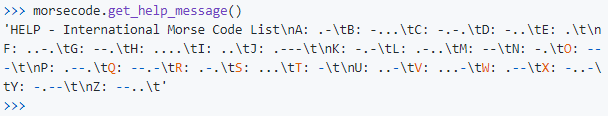

위의 결과값중 \t는 TAB Size로 간격을 벌리는 특수 기호입니다. 실제로 Console창에서 실행시킬때는 8칸씩 글자가 떨어져서 나옵니다.

In [ ]:
# Help Function - 수정하지 말 것
def get_morse_code_dict():
    morse_code = {
        "A": ".-", "N": "-.", "B": "-...", "O": "---", "C": "-.-.", "P": ".--.", "D": "-..", "Q": "--.-", "E": ".",
        "R": ".-.", "F": "..-.", "S": "...", "G": "--.", "T": "-", "H": "....", "U": "..-", "I": "..", "V": "...-",
        "K": "-.-", "X": "-..-", "J": ".---", "W": ".--", "L": ".-..", "Y": "-.--", "M": "--", "Z": "--.."
    }
    return morse_code


# Help Function - 수정하지 말 것
def get_help_message():
    message = "HELP - International Morse Code List\n"
    morse_code = get_morse_code_dict()

    counter = 0

    for key in sorted(morse_code):
        counter += 1
        message += "%s: %s\t" % (key, morse_code[key])
        if counter % 5 == 0:
            message += "\n"

    return message


### **함수 작성하기**

이제 수정해야할 함수 리스트를 살펴봅시다. 총 8개이며 각 함수에 대한 설명은 아래와 같습니다.

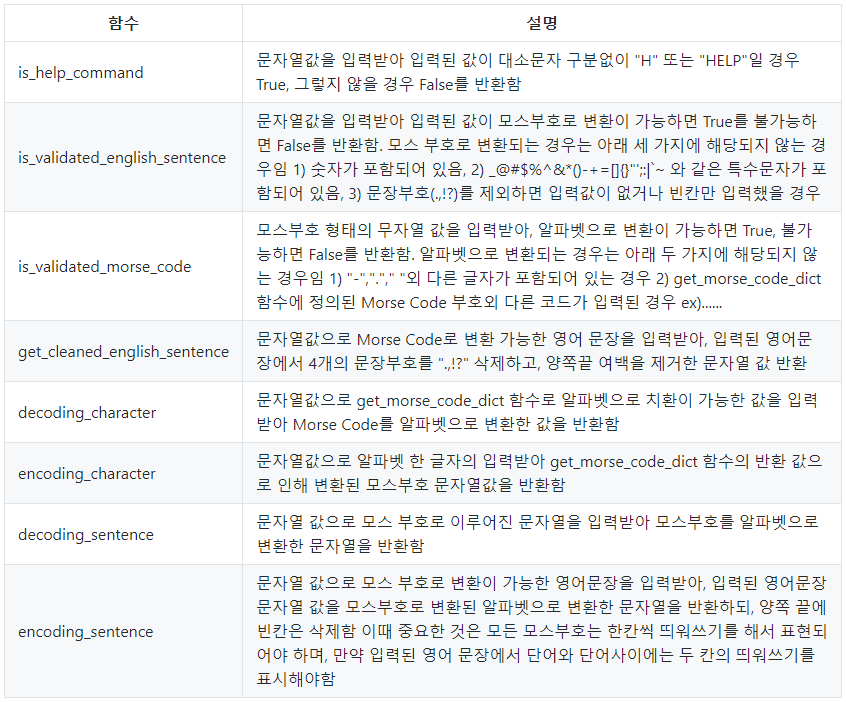

> morsecode에서 encoding_sentence만 pass되지 않는다는 분들이 많으셔서 전체 공지합니다! encoding_sentence 함수에서는 영어 단어 사이에 띄어쓰기가 두 개 이상일 경우 한 개로 처리해준 후 모스부호로 변환해 주어야 합니다!

마지막 **encoding_sentence** 함수가 조금 이해하기 어려울 건데 다음 그림과 같다고 생각하면 됩니다. 즉 !와 같은 문장부호는 삭제하고, 글자와 글자사이에는 한 칸의 여백을 단어와 단어 사이에는 두 칸의 여백을 줘서 모스부호를 출력하면 됩니다.

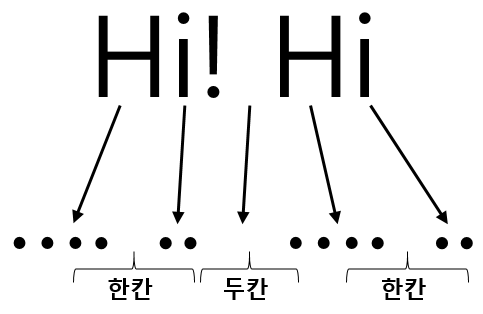

In [ ]:
def is_help_command(user_input):
    """
    Input:
        - user_input : 문자열값으로 사용자가 입력하는 문자
    Output:
        - 입력한 값이 대소문자 구분없이 "H" 또는 "HELP"일 경우 True,
          그렇지 않을 경우 False를 반환함
    Examples:
        >>> import morsecode as mc
        >>> mc.is_help_command("H")
        True
        >>> mc.is_help_command("Help")
        True
        >>> mc.is_help_command("Half")
        False
        >>> mc.is_help_command("HeLp")
        True
        >>> mc.is_help_command("HELLO")
        False
        >>> mc.is_help_command("E")
        False
    """
    # ===Modify codes below=============
    # 조건에 따라 변환되어야 할 결과를 result 변수에 할당 또는 필요에 따라 자유로운 수정
    if (user_input.lower() == 'help') or (user_input.lower() == 'h'):
      result = True
    else:
      result = False

    return result
    # ==================================


def is_validated_english_sentence(user_input):
    """
    Input:
        - user_input : 문자열값으로 사용자가 입력하는 문자
    Output:
        - 입력한 값이 아래에 해당될 경우 False, 그렇지 않으면 True
          1) 숫자가 포함되어 있거나,
          2) _@#$%^&*()-+=[]{}"';:\|`~ 와 같은 특수문자가 포함되어 있거나
          3) 문장부호(.,!?)를 제외하면 입력값이 없거나 빈칸만 입력했을 경우
    Examples:
        >>> import morsecode as mc
        >>> mc.is_validated_english_sentence("Hello 123")
        False
        >>> mc.is_validated_english_sentence("Hi!")
        True
        >>> mc.is_validated_english_sentence(".!.")
        False
        >>> mc.is_validated_english_sentence("!.!")
        False
        >>> mc.is_validated_english_sentence("kkkkk... ^^;")
        False
        >>> mc.is_validated_english_sentence("This is Gachon University.")
        True
    """
    # ===Modify codes below=============
    # 조건에 따라 변환되어야 할 결과를 result 변수에 할당 또는 필요에 따라 자유로운 수정
    morse_code_dict = get_morse_code_dict()
    user_input_list = list(user_input)
    has_alph = False
    for input in user_input_list:
      if input.upper() in morse_code_dict:
        has_alph = True
        pass
      elif input in [" ","!",".",",","?"]:
        pass
      else:
        return False
      
    if not has_alph:
      return False
    return True
    # ==================================


def is_validated_morse_code(user_input):
    """
    Input:
        - user_input : 문자열값으로 사용자가 입력하는 문자
    Output:
        - 입력한 값이 아래에 해당될 경우 False, 그렇지 않으면 True
          1) "-","."," "외 다른 글자가 포함되어 있는 경우
          2) get_morse_code_dict 함수에 정의된 Morse Code 부호외 다른 코드가 입력된 경우 ex)......
    Examples:
        >>> import morsecode as mc
        >>> mc.is_validated_morse_code("..")
        True
        >>> mc.is_validated_morse_code("..-")
        True
        >>> mc.is_validated_morse_code("..-..")
        False
        >>> mc.is_validated_morse_code(". . . .")
        True
        >>> mc.is_validated_morse_code("-- -- -- --")
        True
        >>> mc.is_validated_morse_code("!.1 abc --")
        False
    """
    # ===Modify codes below=============
    # 조건에 따라 변환되어야 할 결과를 result 변수에 할당 또는 필요에 따라 자유로운 수정
    morse_code_values = list(get_morse_code_dict().values())
    user_input_list = user_input.split(" ")
    for input in user_input_list:
      if input in morse_code_values:
        pass
      elif input == "":
        pass
      else:
        return False
    return True
    # ==================================



def get_cleaned_english_sentence(raw_english_sentence):
    """
    Input:
        - raw_english_sentence : 문자열값으로 Morse Code로 변환 가능한 영어 문장
    Output:
        - 입력된 영어문장에수 4개의 문장부호를 ".,!?" 삭제하고, 양쪽끝 여백을 제거한 문자열 값 반환
    Examples:
        >>> import morsecode as mc
        >>> mc.get_cleaned_english_sentence("This is Gachon!!")
        'This is Gachon'
        >>> mc.get_cleaned_english_sentence("Is this Gachon?")
        'Is this Gachon'
        >>> mc.get_cleaned_english_sentence("How are you?")
        'How are you'
        >>> mc.get_cleaned_english_sentence("Fine, Thank you. and you?")
        'Fine Thank you and you'
    """
    # ===Modify codes below=============
    # 조건에 따라 변환되어야 할 결과를 result 변수에 할당 또는 필요에 따라 자유로운 수정
    english_sentence = raw_english_sentence
    marks = ".,!?"
    for i in range(len(marks)):
      english_sentence = english_sentence.replace(marks[i],"")
    english_sentence = english_sentence.strip()
    
    return english_sentence
    # ==================================


def decoding_character(morse_character):
    """
    Input:
        - morse_character : 문자열값으로 get_morse_code_dict 함수로 알파벳으로 치환이 가능한 값의 입력이 보장됨
    Output:
        - Morse Code를 알파벳으로 치환함 값
    Examples:
        >>> import morsecode as mc
        >>> mc.decoding_character("-")
        'T'
        >>> mc.decoding_character(".")
        'E'
        >>> mc.decoding_character(".-")
        'A'
        >>> mc.decoding_character("...")
        'S'
        >>> mc.decoding_character("....")
        'H'
        >>> mc.decoding_character("-.-")
        'K'
    """
    # ===Modify codes below=============
    # 조건에 따라 변환되어야 할 결과를 result 변수에 할당 또는 필요에 따라 자유로운 수정
    reversed_dict = dict(map(reversed,get_morse_code_dict().items()))
    result = reversed_dict[morse_character]
    return result
    # ==================================


def encoding_character(english_character):
    """
    Input:
        - english_character : 문자열값으로 알파벳 한 글자의 입력이 보장됨
    Output:
        - get_morse_code_dict 함수의 반환 값으로 인해 변환된 모스부호 문자열값
    Examples:
        >>> import morsecode as mc
        >>> mc.encoding_character("G")
        '--.'
        >>> mc.encoding_character("A")
        '.-'
        >>> mc.encoding_character("C")
        '-.-.'
        >>> mc.encoding_character("H")
        '....'
        >>> mc.encoding_character("O")
        '---'
        >>> mc.encoding_character("N")
        '-.'
    """
    # ===Modify codes below=============
    # 조건에 따라 변환되어야 할 결과를 result 변수에 할당 또는 필요에 따라 자유로운 수정
    morse_code_dict = get_morse_code_dict()
    result = morse_code_dict[english_character]
    return result
    # ==================================


def decoding_sentence(morse_sentence):
    """
    Input:
        - morse_sentence : 문자열 값으로 모스 부호를 표현하는 문자열
    Output:
        - 모스부호를 알파벳으로 변환한 문자열
    Examples:
        >>> import morsecode as mc
        >>> mc.decoding_sentence("... --- ...")
        'SOS'
        >>> mc.decoding_sentence("--. .- -.-. .... --- -.")
        'GACHON'
        >>> mc.decoding_sentence("..  .-.. --- ...- .  -.-- --- ..-")
        'I LOVE YOU'
        >>> mc.decoding_sentence("-.-- --- ..-  .- .-. .  ..-. ")
        'YOU ARE F'
    """
    # ===Modify codes below=============
    # 조건에 따라 변환되어야 할 결과를 result 변수에 할당 또는 필요에 따라 자유로운 수정
    reversed_dict = dict(map(reversed,get_morse_code_dict().items()))
    morse_list = morse_sentence.split(" ")
    for i in range(len(morse_list)):
      if morse_list[i] in reversed_dict:
        morse_list[i] = reversed_dict[morse_list[i]]
      else:
        morse_list[i] = " "
    result = "".join(morse_list)
    return result
    # ==================================


def encoding_sentence(english_sentence):
    """
    Input:
        - english_sentence : 문자열 값으로 모스 부호로 변환이 가능한 영어문장
    Output:
        - 입력된 영어문장 문자열 값을 모스부호로 변환된 알파벳으로 변환한 문자열
          단 양쪽 끝에 빈칸은 삭제한다.
    Examples:
        >>> import morsecode as mc
        >>> mc.encoding_sentence("HI! Fine, Thank you.")
        '.... ..  ..-. .. -. .  - .... .- -. -.-  -.-- --- ..-'
        >>> mc.encoding_sentence("Hello! This is CS fifty Class.")
        '.... . .-.. .-.. ---  - .... .. ...  .. ...  -.-. ...  ..-. .. ..-. - -.--  -.-. .-.. .- ... ...'
        >>> mc.encoding_sentence("We Are Gachon")
        '.-- .  .- .-. .  --. .- -.-. .... --- -.'
        >>> mc.encoding_sentence("Hi! Hi!")
        '.... ..  .... ..'
    """
    # ===Modify codes below=============
    # 조건에 따라 변환되어야 할 결과를 result 변수에 할당 또는 필요에 따라 자유로운 수정
    morse_code_dict = get_morse_code_dict()
    cleaned_sentence = get_cleaned_english_sentence(english_sentence)
    cleaned_sentence = " ".join(cleaned_sentence.split())
    word_list = list(cleaned_sentence)
    result =""
    for word in word_list:
      if word.upper() in morse_code_dict:
        result += morse_code_dict[word.upper()]
      else:
        result += word
        continue
      result +=" "
    result = result.rstrip()

    return result
    # ==================================


## main 함수 수정하기
이번 Lab의 메인함수는 비교적 간단합니다.

---

**main** 함수는 다음과 같은 규칙을 가집니다.
1. 사용자가 0을 입력하면 종료된다.

2. 사용자가 대소문자에 상관없이 "h"또는 "help"를 입력하면 **get_help_message** 함수를 호출하여 아래와 같이 출력된다.

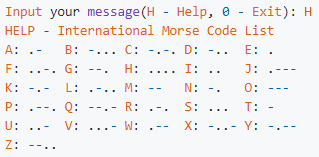

3. 모스부호로 변환이 가능한 알파벳 문장이 입력되면 모스부호로 변환된 값이 출력된다.

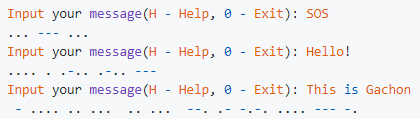

4. 알파벳으로 변환이 가능한 모스부호가 입력되면 알파벳으로 변환해준다.

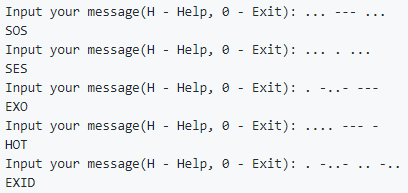

5. 그외 변환이 불가능한 입력일 경우 에러 메세지를 출력한다.

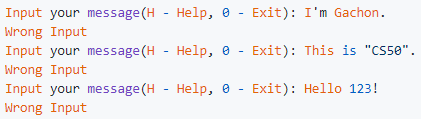

---

아래는 기본 Template입니다.


In [ ]:
def main():
    print("Morse Code Program!!")
    # ===Modify codes below=============
    while True:
      user_input = input("Input your message(H - Help, 0 - Exit) : ")
      if user_input == "0":
        break
      if (user_input.lower() == "h") or (user_input.lower() == 'help'):
        message = get_help_message()
        print(message)
        continue
      morse_code = is_validated_morse_code(user_input)
      english_sentence = is_validated_english_sentence(user_input)
      if (not morse_code) and (not english_sentence):
        print("Wrong Input")
        continue
      if morse_code:
        morse_to_sentence = decoding_sentence(user_input)
        print(morse_to_sentence)
      elif english_sentence:
        cleaned_sentence = get_cleaned_english_sentence(user_input)
        sentence_to_morse = encoding_sentence(user_input)
        print(sentence_to_morse)
        


    # ==================================
    print("Good Bye")
    print("Morse Code Program Finished!!")

if __name__ == "__main__":
    main()

실제로 실행된 프로그램의 예제 화면은 아래와 같습니다.

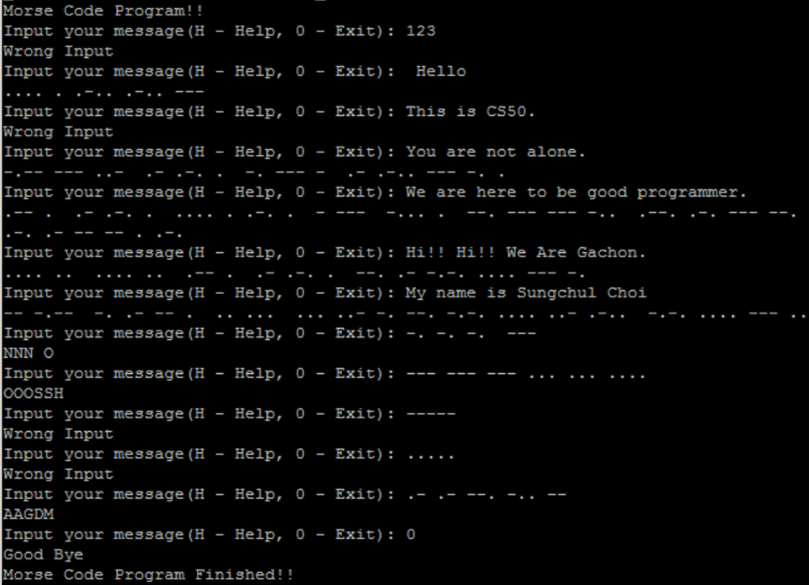

In [ ]:
# 한번만 설치해주시면 되고, 그 다음부터는 주석처리 해놓으시면 됩니다.

# !pip install mock

In [ ]:
import unittest

from mock import patch
from io import StringIO

class TestMorseCode(unittest.TestCase):

    def test_is_help_command(self):
        self.assertTrue(is_help_command("H"))
        self.assertTrue(is_help_command("h"))
        self.assertTrue(is_help_command("Help"))
        self.assertTrue(is_help_command("heLp"))

        self.assertFalse(is_help_command("xxx"))
        self.assertFalse(is_help_command("gelp"))

    def test_is_validated_english_sentence(self):
        self.assertFalse(is_validated_english_sentence("!_X_!"))
        self.assertFalse(is_validated_english_sentence(".$."))
        self.assertFalse(is_validated_english_sentence("Base_ball"))
        self.assertFalse(is_validated_english_sentence("def main()"))
        self.assertFalse(is_validated_english_sentence("..."))
        self.assertFalse(is_validated_english_sentence(""))
        self.assertFalse(is_validated_english_sentence("   "))
        self.assertFalse(is_validated_english_sentence("Hello 123"))

        self.assertTrue(is_validated_english_sentence("Hello World!"))
        self.assertTrue(is_validated_english_sentence("!X!"))
        self.assertTrue(is_validated_english_sentence("Testing started at "))
        self.assertTrue(is_validated_english_sentence("Process finished with exit code"))

    def test_is_validated_morse_code(self):
        self.assertTrue(is_validated_morse_code("-"))
        self.assertTrue(is_validated_morse_code("-."))
        self.assertTrue(is_validated_morse_code('... --- ...'))
        self.assertTrue(is_validated_morse_code('.... . .-.. .-.. ---'))
        self.assertTrue(is_validated_morse_code('.... ..'))

        self.assertFalse(is_validated_morse_code('....... .. '))
        self.assertFalse(is_validated_morse_code('lfef'))
        self.assertFalse(is_validated_morse_code('.-.---.-- .---. ----'))

    def test_get_cleaned_english_sentence(self):
        test_sentence = "This is CS50."
        self.assertEqual(
            get_cleaned_english_sentence(test_sentence),
            self._get_cleaned_english_sentence(test_sentence),
        )

        test_sentence = "This is CS50!!!"
        self.assertEqual(
            get_cleaned_english_sentence(test_sentence),
            "This is CS50",
        )

        test_sentence = "Hello, My name is CS50?"
        self.assertEqual(
            get_cleaned_english_sentence(test_sentence),
            "Hello My name is CS50",
        )

    def test_decoding_character(self):
        self.assertEqual(decoding_character("-"), "T")
        self.assertEqual(decoding_character(".-"), "A")
        self.assertEqual(decoding_character(".-."), "R")
        self.assertEqual(decoding_character("-.-"), "K")
        self.assertEqual(decoding_character("..-."), "F")
        self.assertEqual(decoding_character(".--."), "P")

    def test_encoding_character(self):
        self.assertEqual(encoding_character("T"), "-")
        self.assertEqual(encoding_character("A"), ".-")
        self.assertEqual(encoding_character("R"), ".-.")
        self.assertEqual(encoding_character("K"), "-.-")
        self.assertEqual(encoding_character("F"), "..-.")
        self.assertEqual(encoding_character("P"), ".--.")

    def test_decoding_sentence(self):
        self.assertEqual(decoding_sentence("... --- ..."), "SOS")
        self.assertEqual(decoding_sentence(".... . .-.. .-.. ---"), "HELLO")
        self.assertEqual(decoding_sentence("--. .- -.-. .... --- -."), "GACHON")
        self.assertEqual(decoding_sentence(".. -- ."), "IME")

    def test_encoding_sentence(self):
        self.assertEqual((encoding_sentence("Sungchul    CHOI") ).strip(), "... ..- -. --. -.-. .... ..- .-..  -.-. .... --- ..")
        self.assertEqual((encoding_sentence("GACHON UNIV.!")).strip(), "--. .- -.-. .... --- -.  ..- -. .. ...-")
        self.assertEqual((encoding_sentence("HI! Fine Thank, you.")).strip(), ".... ..  ..-. .. -. .  - .... .- -. -.-  -.-- --- ..-")
        self.assertEqual((encoding_sentence("WHERE ARE YOU GOING?")).strip(), ".-- .... . .-. .  .- .-. .  -.-- --- ..-  --. --- .. -. --.")

    def test_main(self):
        for x in range(50):
            with patch('builtins.input', side_effect=["0"]):
                with patch('sys.stdout', new=StringIO()) as fakeOutput:
                    main()
                    console = fakeOutput.getvalue().strip().split("\n")
                    self.assertIn(console[1].upper(), "GOOD BYE")

        input_list = ["woesds.l;", "_e_we", "12434cscs21", "545caacas", "--------", "0"]
        with patch('builtins.input', side_effect=input_list):
            with patch('sys.stdout', new=StringIO()) as fakeOutput:
                main()
                console = fakeOutput.getvalue().strip().split("\n")
                self.assertIn("WRONG", console[1].upper())
                self.assertIn("WRONG", console[2].upper())
                self.assertIn("WRONG", console[3].upper())
                self.assertIn("WRONG", console[4].upper())
                self.assertIn("WRONG", console[5].upper())

        print(console)

        input_list = ["Hello!!", "Hi, Gachon", "This is,! CS50", "WTF!", "--. --", "--. --.  --. -  -  -  - . . . .",
                      "::helo::", "0"]
        with patch('builtins.input', side_effect=input_list):
            with patch('sys.stdout', new=StringIO()) as fakeOutput:
                main()
                console = fakeOutput.getvalue().strip().split("\n")
                self.assertIn(".... . .-.. .-.. ---", console[1].upper())
                self.assertIn(".... ..  --. .- -.-. .... --- -.", console[2].upper())
                self.assertIn("WRONG", console[3].upper())
                self.assertIn(".-- - ..-.", console[4].upper())
                self.assertIn("GM", console[5].upper())
                self.assertIn("GG GT T T TEEEE", console[6].upper())
                self.assertIn("WRONG", console[7].upper())


    def _get_cleaned_english_sentence(self, raw_english_sentence):
        english_sentence = "".join([character for character in raw_english_sentence if character not in ".,!?"])
        return english_sentence

    def _decoding_character(self, morse_character):
        morse_code_dict = self.get_morse_code_dict()
        for k, v in morse_code_dict.items():
            if v == morse_character:
                return k

    def _encoding_character(self, english_character):
        morse_code_dict = self.get_morse_code_dict()
        return morse_code_dict[english_character.upper()]

    def _decoding_sentence(self, morse_sentence):
        result = []
        for character in morse_sentence.split(" "):
            if character is not "":
                result.append(self.decoding_character(character))
            else:
                result.append("-")
        return " ".join(result).replace(" ", "").replace("-", " ")

    def _encoding_sentence(self, english_sentence):
        english_sentence = self.get_cleaned_english_sentence(english_sentence)
        sentence_list = english_sentence.split()
        result = []
        for word in sentence_list:
            for character in word:
                result.append(self.encoding_character(character))
            result.append("T")
        return " ".join(result).replace("T", "")

    def _get_morse_code_dict(self):
        morse_code = {
            "A": ".-", "N": "-.", "B": "-...", "O": "---", "C": "-.-.", "P": ".--.", "D": "-..", "Q": "--.-", "E": ".",
            "R": ".-.", "F": "..-.", "S": "...", "G": "--.", "T": "-", "H": "....", "U": "..-", "I": "..", "V": "...-",
            "K": "-.-", "X": "-..-", "J": ".---", "W": ".--", "L": ".-..", "Y": "-.--", "M": "--", "Z": "--.."
        }
        return morse_code

## Test Code

아래는 본인이 짠 code가 맞는지 test하는 code입니다.

함수별로 test가 진행되고, AssertionError 없이 모두 통과하면 성공입니다 !

만약 AssertionError가 발생했다면, 해당 Error가 어느 함수에서 발생했는지를 확인하고, 그 부분을 수정해주시면 되겠습니다.

In [ ]:
tmc = TestMorseCode()

tmc.test_is_help_command()
tmc.test_is_validated_english_sentence()
tmc.test_is_validated_morse_code()
tmc.test_get_cleaned_english_sentence()
tmc.test_decoding_character()
tmc.test_encoding_character()
tmc.test_decoding_sentence()
tmc.test_encoding_sentence()
tmc.test_main()

print("Congratulation!")